#### Objective 

To predict the concrete stregth using the available data.Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

#### Setting the working directory ####

In [1]:
import os 

In [2]:
os.getcwd()

'/Users/bhargavikanchiraju/Desktop/PythonCode_UTA/Model Tuning'

###### Importing the required libraries

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt# matplotlib.pyplot plots data
%matplotlib inline 
from sklearn.model_selection import train_test_split
import missingno as msno
import warnings
pd.options.display.max_columns = None
pd.options.display.max_rows = None
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format

###### Read the dataset

In [4]:
data=pd.read_csv('concrete.csv')

In [5]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29


In [6]:
data.shape

(1030, 9)

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,"1,030.00",281.17,104.51,102.00,192.38,272.90,350.00,540.00
slag,"1,030.00",73.90,86.28,0.00,0.00,22.00,142.95,359.40
ash,"1,030.00",54.19,64.00,0.00,0.00,0.00,118.30,200.10
water,"1,030.00",181.57,21.35,121.80,164.90,185.00,192.00,247.00
superplastic,"1,030.00",6.20,5.97,0.00,0.00,6.40,10.20,32.20
coarseagg,"1,030.00",972.92,77.75,801.00,932.00,968.00,"1,029.40","1,145.00"
fineagg,"1,030.00",773.58,80.18,594.00,730.95,779.50,824.00,992.60
age,"1,030.00",45.66,63.17,1.00,7.00,28.00,56.00,365.00
strength,"1,030.00",35.82,16.71,2.33,23.71,34.45,46.14,82.60


In [8]:
data.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [9]:
data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

All features are continous and none categorical.

###### Basic checks on the data before the analysis 

In [10]:
def basic_checks(df):
    
    print('='*50)
    print('Shape of the dataframe is: \n',df.shape)
    print('='*50)
    print('Basic stats for the data: \n',df.describe())
    print('='*50)
    print('Data type and info :')
    print(df.info())
    print('='*50)
    print('Missing value information : \n',df.isnull().any())
    print('='*50)
    print('Sum of missing values if any : \n',df.isnull().sum())

In [11]:
basic_checks(data)

Shape of the dataframe is: 
 (1030, 9)
Basic stats for the data: 
         cement     slag      ash    water  superplastic  coarseagg  fineagg  \
count 1,030.00 1,030.00 1,030.00 1,030.00      1,030.00   1,030.00 1,030.00   
mean    281.17    73.90    54.19   181.57          6.20     972.92   773.58   
std     104.51    86.28    64.00    21.35          5.97      77.75    80.18   
min     102.00     0.00     0.00   121.80          0.00     801.00   594.00   
25%     192.38     0.00     0.00   164.90          0.00     932.00   730.95   
50%     272.90    22.00     0.00   185.00          6.40     968.00   779.50   
75%     350.00   142.95   118.30   192.00         10.20   1,029.40   824.00   
max     540.00   359.40   200.10   247.00         32.20   1,145.00   992.60   

           age  strength  
count 1,030.00  1,030.00  
mean     45.66     35.82  
std      63.17     16.71  
min       1.00      2.33  
25%       7.00     23.71  
50%      28.00     34.45  
75%      56.00     46.14  
max  

###### Missing values matrix

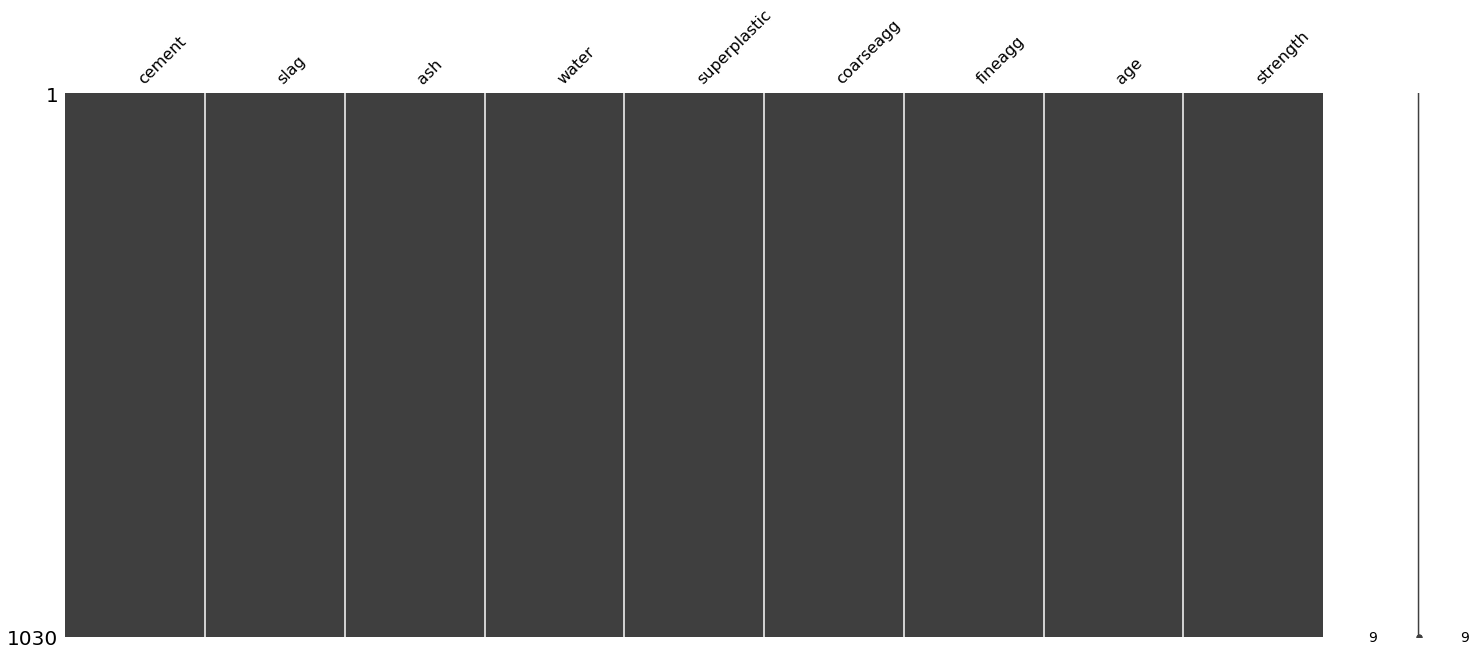

In [12]:
msno.matrix(data)

Clearly there's no missing values in the data set.

###### Univariate and bivariate analysis

In [13]:
data.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.00,-0.28,-0.40,-0.08,0.09,-0.11,-0.22,0.08,0.50
slag,-0.28,1.00,-0.32,0.11,0.04,-0.28,-0.28,-0.04,0.13
ash,-0.40,-0.32,1.00,-0.26,0.38,-0.01,0.08,-0.15,-0.11
water,-0.08,0.11,-0.26,1.00,-0.66,-0.18,-0.45,0.28,-0.29
superplastic,0.09,0.04,0.38,-0.66,1.00,-0.27,0.22,-0.19,0.37
coarseagg,-0.11,-0.28,-0.01,-0.18,-0.27,1.00,-0.18,-0.00,-0.16
fineagg,-0.22,-0.28,0.08,-0.45,0.22,-0.18,1.00,-0.16,-0.17
age,0.08,-0.04,-0.15,0.28,-0.19,-0.00,-0.16,1.00,0.33
strength,0.50,0.13,-0.11,-0.29,0.37,-0.16,-0.17,0.33,1.00


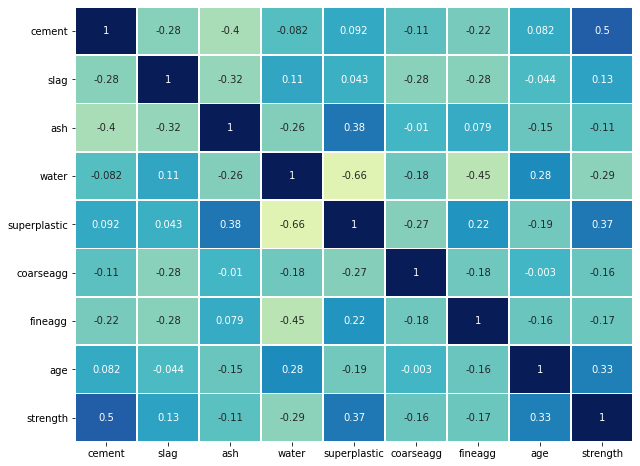

In [14]:
plt.figure(figsize=(10,8))

sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

#### EDA - Part 1 

Basic checks

1. The data frame has 1030 records and 9 columns
2. The features in the dataset are either float/int type .
3. The minimum strength of concrete is 2.33 and the maximum 82.6
4. The maximum cement value is 540 and the minimum used is 102,with the average value at 281.1
5. There’s no usage of slag (at minimum) and the maximum usage is at 359.4
6. Average Fly Ash used is 54.19 with maximum at 200.10
7. Average water usage is at 181.57 and maximum is at 247.
8. Superplasticizer usage is at minimum value of 0 and maximum usage is at 32.2,with the  average value at 6.2
9. Coarse aggregate is at a maximum of 1145 and a minimum  of 801.
10. Fine aggregate is at an average value of 773.58 and a maximum of 992.6
11. The average age of the concrete is 45.66 days and the maximum value is at 82.6 days with minimum at 2.33 days.

#### Missing values

There are no missing values in the dataset.

#### Correlation matrix 

1. Strength and cement seem to be somewhat correlated 
2. There is also some correlation between strength and age ,strength and superplastic.
3. Ash,water,coarseagg,fineagg are negatively correlated to the strength of the concrete.
4. There is also a good level of negative correlation between water and superplastic & water and fine aggregate.


### Univariate and bivariate plots - Continous variables 

In [15]:
def plots(variable):
    fig=plt.figure(figsize=(10,5))
    plt.subplot(221)
    sns.distplot(data[variable])
    plt.xticks(rotation=90)
    plt.subplot(222)
    sns.boxplot(x=data[variable])
    plt.xticks(rotation=90)
    plt.subplot(223)
    sns.boxplot(x=data['strength'],y=data[variable])
    plt.xticks(rotation=90)
    plt.subplot(224)
    sns.barplot(x='strength',y=data[variable],data=data)
    plt.xticks(rotation=90)

##### cement #####

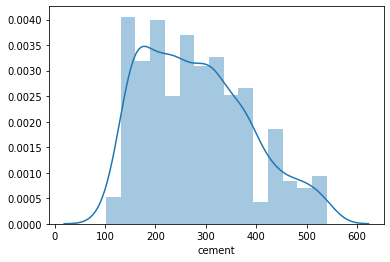

In [16]:
sns.distplot(data['cement'])

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

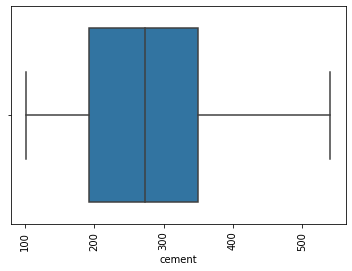

In [17]:
sns.boxplot(x=data['cement'])
plt.xticks(rotation=90)

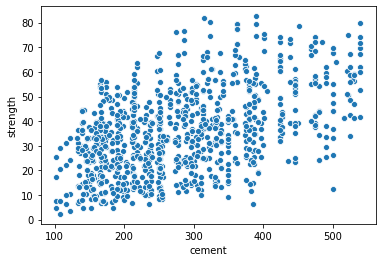

In [18]:
sns.scatterplot(data=data,x='cement',y='strength')

In [19]:
def cem_cat(x):
    if (x>100)&(x<=200):
        return 0
    else :
            if (x>200)&(x<=300):
                return 1
            else :
                if (x>300)&(x<=400):
                    return 2
                else:
                    if(x>400)&(x<=530):
                        return 3

In [20]:
data['cement_category']=data['cement'].apply(cem_cat)

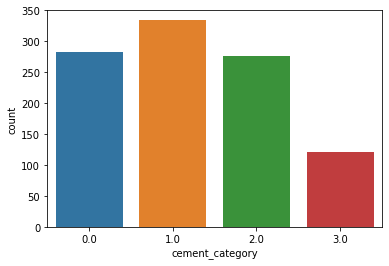

In [21]:
sns.countplot('cement_category',data=data)

##### slag #####

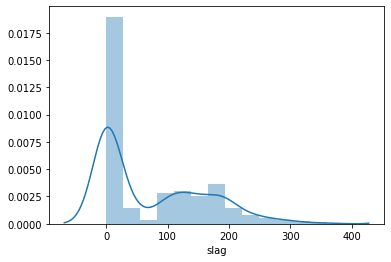

In [22]:
sns.distplot(data['slag'])

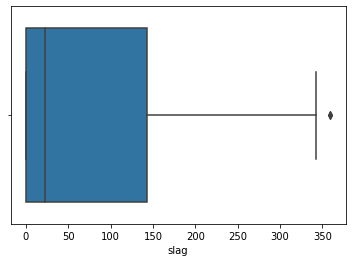

In [23]:
sns.boxplot(x=data['slag'])

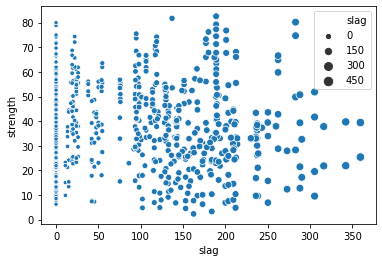

In [24]:
sns.scatterplot(data=data,x='slag',y='strength',size='slag')

In [25]:
def slag_cat(x):
    if (x==0):
        return 0
    else:
        if (x>0)&(x<=100):
            return 1
        else:
            if (x>100)&(x<=200):
                return 2
            else:
                if (x>200)&(x<=300):
                    return 3
                else:
                    if(x>300)&(x<=400):
                        return 4

In [26]:
data['slag_category']=data['slag'].apply(slag_cat)

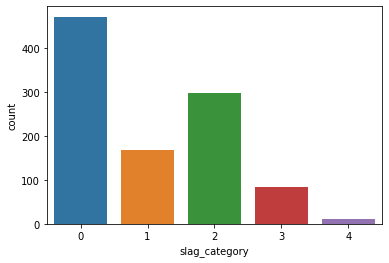

In [27]:
sns.countplot(data['slag_category'],data=data)

##### ash #####

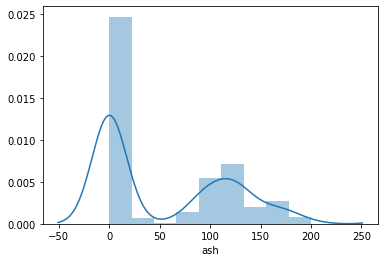

In [28]:
sns.distplot(data['ash'])

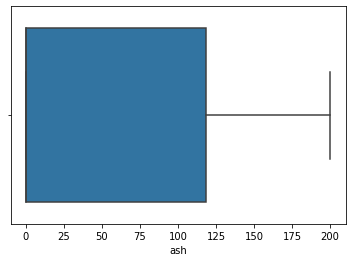

In [29]:
sns.boxplot(x=data['ash'])

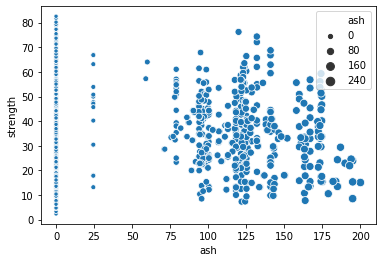

In [30]:
sns.scatterplot(data=data,x='ash',y='strength',size='ash')

In [31]:
def ash_cat(x):
    if (x==0):
        return 0
    else :
        if (x>0)&(x<=100):
            return 1
        else :
        
            if (x>100)&(x<=150):
                return 2
            else:
                
                    if (x>150)&(x<=200):
                        return 3
            

In [32]:
data['ash_category']=data['ash'].apply(ash_cat)

In [33]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,cement_category,slag_category,ash_category
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89,0.00,3,0.00
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51,0.00,1,2.00
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22,1.00,0,1.00
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85,1.00,2,0.00
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29,0.00,2,0.00


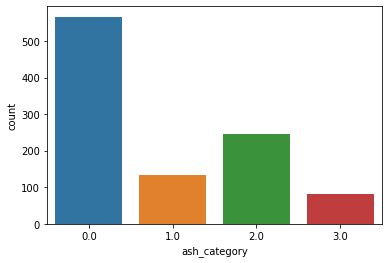

In [34]:
sns.countplot('ash_category',data=data)

##### water #####

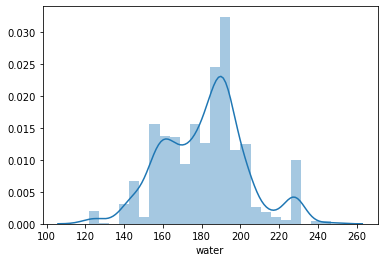

In [35]:
sns.distplot(data['water'])

In [ ]:
def wat_cat(x):
    if(x>=120)&(x<=145):
        return 0
    else:
        if(x>145)&(x<=170):
            return 1
        else:
            if(x>170)&(x<=195):
                return 2
            else:
                if(x>195)&(x<=230):
                    return 3

In [ ]:
data['water_category']=data['water'].apply(wat_cat)

In [ ]:
sns.boxplot(data['water'])

In [ ]:
sns.scatterplot(data=data,x='water',y='strength',size='water')

In [ ]:
data.head()

In [ ]:
sns.countplot(data['water_category'],data=data)

##### superplastic #####

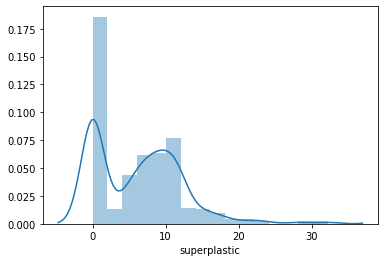

In [36]:
sns.distplot(data['superplastic'])

In [ ]:
sns.scatterplot(data=data,x='superplastic',y='strength',size='superplastic')

In [ ]:
def super_cat(x):
    if (x==0):
        return 0
    else:
        if (x>0)&(x<=10):
            return 1
        else:
            if(x>10)&(x<=23):
                return 2

In [ ]:
data['superplastic_category']=data['superplastic'].apply(super_cat)

In [ ]:
data.head()

In [ ]:
sns.countplot(data['superplastic_category'],data=data)

In [ ]:
sns.boxplot(data['superplastic'])

##### coarseagg #####

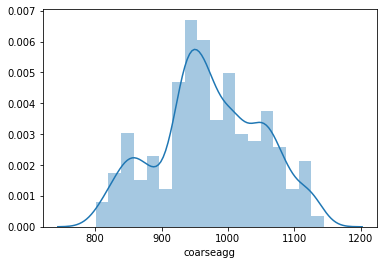

In [37]:
sns.distplot(data['coarseagg'])

In [ ]:
sns.scatterplot(data=data,x='coarseagg',y='strength',size='coarseagg')

In [ ]:
def coarse_cat(x):
    if (x>=800)&(x<=900):
        return 0
    else:
            if (x>900)&(x<=1000):
                return 1
            else:
                if(x>1000)&(x<=1200):
                    return 2
                 

In [ ]:
data['coarseagg_category']=data['coarseagg'].apply(coarse_cat)

In [ ]:
data.head()

In [ ]:
sns.countplot(data['coarseagg_category'])

In [ ]:
sns.boxplot(data['coarseagg'])

##### fineagg #####

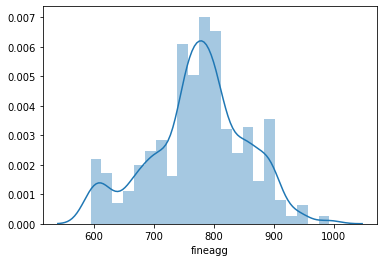

In [38]:
sns.distplot(data['fineagg'])

In [ ]:
sns.boxplot(data['fineagg'])

In [ ]:
sns.scatterplot(data=data,x='fineagg',y='strength',size='fineagg')

In [ ]:
def fineagg_cat(x):
    if (x>590)&(x<=700):
        return 0
    else:
        if (x>700)&(x<=800):
            return 1
        else:
            if(x>800)&(x<=945):
                return 2

In [ ]:
data['fineagg_category']=data['fineagg'].apply(fineagg_cat)

In [ ]:
data.head()

In [ ]:
sns.countplot(data['fineagg_category'])

##### age #####

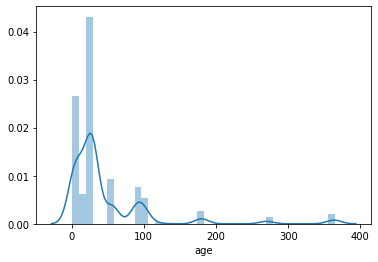

In [39]:
sns.distplot(data['age'])

In [ ]:
sns.boxplot(data['age'])

In [ ]:
sns.countplot(data['age'])

In [ ]:
sns.scatterplot(data=data,x='age',y='strength',size='age')

##### Additional scatter plots - Multivariate analysis #####

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="strength", x="cement", hue="water", data=data, ax=ax, sizes=(50, 300))
ax.set_title("Strength vs (Cement,Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

1.Strength increases with the amount of cement 
2.Strength seems to increase with a certain lesser proportions of water are used

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="strength", x="age", hue="water", data=data, ax=ax, sizes=(50, 300))
ax.set_title("Strength vs (Age,Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

1.Concrete with higher strength seems to be using lesser water
2.There's slight variation in the strength with the age of the concrete

In [ ]:

fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="strength", x="fineagg", hue="ash", size="superplastic", 
                data=data, ax=ax, sizes=(50, 300))
ax.set_title("Strength vs (Fineagg, Superplastic,ash)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

1.As ash increases strength decreases
2.Lower ash shows higher strength
3.fineagg increases strength of the concrete decreases
4.strength increases with superplastic

###### Dependant variable distribution

In [ ]:
data['strength'].describe()

In [ ]:
sns.distplot(data['strength'])

In [ ]:
sns.boxplot(data['strength'])

EDA - part 2 

Univariate analysis 

Cement

1. Distribution of the cement variable is slightly skewed
2. Boxplot shows the median value at 280 .
3. A majority of the data used are for cement quantity between 200 & 300 Kg.
4. A scatterplot between strength and cement shows higher the amount of cement ,greater the strength of the concrete.

Slag/Blast furnace slag

1. Slag increases the strength and durability of concrete.
2. We see the distribution of the variable is non normal and right skewed
3. We see some outliers in the data which are above350
4. A scatterplot shows no strict relationship between concrete strength and blast furnace slag
5. We see varied strengths when slag usage is 0 .Higher slag usage shows no improvement in strength of the concrete.
6. No blast furnace slag is the most used option, followed by 100-200 Kg in m3.

Ash /Fly Ash

1. Fly ash and concrete strength are negatively related.
2. The variable distribution is right skewed and non normal 
3. The box plot shows no outliers in the data
4. Increase in the usage of Fly ash seems to show some level of decrease in strength although they may not be correlated fully.
5. Those that have high strength show no/low usage of Fly ash from the visual in the scatterplot.
6. Most use ash option is 0 Kg/m3,followed by 100-150 kg/m3

Water

1. Distribution of the water variable is far less skewed and looks somewhat normal 
2. The data however shows some outliers 
3. From the scatterplot, those with highest strength seems to be using a moderate mix of water ,not too low ,not too high 
4. Most use between 170-195 kg/m3 water to strengthen the concrete 

Superplastic/superplasticizer

Superplasticizer are used to ensure better flow properties because they minimize particle segregation. Further, they allow to decrease the water-cement ratio which leads to higher compressive strength.

1. There is some correlation between concrete strength and the usage of superplasticizer.
2. The data distribution is non normal and looks like a sinusoidal distribution, that’s right skewed .
3. Moderate to high quantities of super plasticiser are used to increase the strength of the concrete.
4. There’s nearly equal distribution in the usage of superplasticizer<=10 and no usage of superplasticizer
5. There are outliers in this data and they need to be treated.

Coarse agg/Coarse aggregate 

1. Shows close to normal distribution of the data .boxplot shows uniform distribution of data with median above 950.
2. High usage of coarse aggregate seems to be lower the concrete strength form what’s seen in the scatterplot.
3. Most popular usage option for coarse aggregate is >900 kg/m3 and <=1000 kg/m3.

Fineagg/Fine aggregate 

1. The distribution looks close to normal ,the box plot shows even distribution with outliers .The median value lies between 750-800.
2. Fineagg and Strength are negatively correlated ,increase in the usage of fine aggregate quantity decreases the concrete strength.
3. Most used option is between 700-800 Kg/m3 of fine aggregate.

Age 

1. Age data is extremely right skewed ,with a lot of outliers in it.The outliers need to be treated to study this variable.
2. Most popular age option is 28 days ,followed by 3 & 7 
3. Very high ages show a decrease in the concrete strength,those that are between 25-100 days show relatively higher strength of concrete.

Multivariate plots 

Strength vs Cement & Water 

1. Strength increases with the amount of cement 
2. Strength seems to increase with a certain lesser proportions of water are used.

Strength vs Age & Water

1. Concrete with higher strength seems to be using lesser water 
2. There's slight variation in the strength with the age of the concrete

Strength vs Fineagg, superplastic & ash

1. As ash increases strength decreases 
2. Lower ash shows higher strength 
3. fineagg increases strength of the concrete decreases 
4. strength increases with superplastic

Dependant variable distribution

1. Strength shows close to normal distribution with some outliers close to 80 Mpa
2. Median strength is at 34.45 Mpa and mean is at 35.83 Mpa ,not much difference between the mean and median indicating a close to normal distribution.

In [ ]:
############################# Data Preprocessing ############################################

##### Data Preprocessing #####

**Outlier treatment** 

1. A function was written to determine the outliers for the input variable ,based on the output of this function the outliers are either replaced with central value(median) or lower or upper bound values.
2. Variables Slag,Water,Superplastic,Fineagg,Age have outliers in the data and need to be treated to replace values with either central values/upper bound or lower bound values .
3. After treatment was done ,check the box plots to see if there’s still any outliers and also the distribution of the data.


**Feature engineering -Introducing new variables and dropping the unwanted variables**

1. Observing all the variables and trying to understand the correlations between them ,we see that there’s no variable that’s highly correlated which can be hence dropped .
2. Using the domain understanding for this problem ,we understand that water to cement ratio is an important aspect that would be checked when determining the strength of concrete.
3. The water–cement ratio is the ratio of the weight of water to the weight of cement used in a concrete mix. A lower ratio leads to higher strength and durability, but may make the mix difficult to work with and form. Workability can be resolved with the use of super-plasticizers.
4. Plotting a scatterplot shows us that greater strength of concrete is with water to cement ration lesser than 0.6 and greater than 0.45.
5. We will go ahead and drop the main variables corresponding to the water/cement ratio in the hope that this added new variable will be able to explain the dependant variable well enough .

**NB**

The model and its results were run with both water/ cement ratio and also without it and the water/cement ratio explained the data well ,without much overfitting the data, which is why this model was picked up to be shown in detail.

In short Dataset 0 = Concrete strength data (as it is - without W/C ratio)
Dataset 1 = Concrete strength dataset with W/C ratio and dropping Water and Cement variables.

**Dropping the unnecessary variables** 

Since we had introduced a few categorical variables during EDA ,we will drop those unnecessary variables before proceeding with scaling & modelling the data


**Splitting the train and test data** 

1. We split the data into train and test 
2. derive the independent and dependant variables from the current dataset

**Scaling the data** 
1. Import the necessary variables for scaling 
2. Fit and transform the train and test data


#### Outlier treatments 

In [ ]:
def outlier(x):
    sorted(x)
    Q1,Q3=np.percentile(x,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

##### Slag #####

In [ ]:
outlier(data['slag'])

In [ ]:
A=np.percentile(data['slag'], 99.85, axis=0)
A

In [ ]:
sns.boxplot(data['slag'])

In [ ]:
lowerbound,upperbound=outlier(data['slag'])

In [ ]:
data[(data['slag']<lowerbound)|(data['slag']>upperbound)]

In [ ]:
data['slag'].describe()

In [ ]:
data['slag']=np.where(data['slag']>upperbound,357.375,data['slag'])

In [ ]:
#### 2 records with outliers .Not sure how to treat them

In [ ]:
data.count()

##### Water ######

In [ ]:
outlier(data['water'])

In [ ]:
sns.boxplot(data['water'])

In [ ]:
data['water'].describe()

In [ ]:
median=np.median(data['water'])

In [ ]:
lowerbound,upperbound=outlier(data['water'])

In [ ]:
data[(data['water']<lowerbound)|(data['water']>upperbound)]

In [ ]:
data['water']=np.where(data['water']>upperbound,232.64,data['water'])
data['water']=np.where(data['water']<lowerbound,124.2,data['water'])

9 outliers in the data 

##### superplastic #####

In [ ]:
data['superplastic'].describe()

In [ ]:
sns.boxplot(data['superplastic'])

In [ ]:
outlier(data['superplastic'])

In [ ]:
lowerbound,upperbound=outlier(data['superplastic'])

In [ ]:
median=np.median(data['superplastic'])
median

In [ ]:
data[(data['superplastic']<lowerbound)|(data['superplastic']>upperbound)]

In [ ]:
data['superplastic']=np.where(data['superplastic']>upperbound,25.5,data['superplastic'])
#data['superplastic']=np.where(data['superplastic']<lowerbound,median,data['superplastic'])

10 outliers in superplastic variable

##### Fineagg #####

In [ ]:
outlier(data['fineagg'])

In [ ]:
sns.boxplot(data['fineagg'])

In [ ]:
np.median(data['fineagg'])

In [ ]:
lowerbound,upperbound=outlier(data['fineagg'])

In [ ]:
data[(data['fineagg']<lowerbound)|(data['fineagg']>upperbound)]

In [ ]:
data['fineagg']=np.where(data['fineagg']>upperbound,963.575,data['fineagg'])


5 outliers in the data for fineagg

##### age ######

In [ ]:
outlier(data['age'])

In [ ]:
sns.boxplot(data['age'])

In [ ]:
np.median(data['age'])

In [ ]:
data['age'].describe()

In [ ]:
lowerbound,upperbound=outlier(data['age'])

In [ ]:
data[(data['age']<lowerbound)|(data['age']>upperbound)].count()

In [ ]:
data['age']=np.where(data['age']>upperbound,129.5,data['age'])

#### Water/Cement ratio 

In [ ]:
data['w/c']=data['water']/data['cement']

In [ ]:
data['w/c'].describe()

In [ ]:
sns.boxplot(data['w/c'])

In [ ]:
outlier(data['w/c'])

In [ ]:
lowerbound,upperbound=outlier(data['w/c'])

In [ ]:
data[(data['w/c']<lowerbound)|(data['w/c']>upperbound)].count()

In [ ]:
data['w/c']=np.where(data['w/c']>upperbound,1.537,data['w/c'])

In [ ]:
sns.distplot(data['w/c'])

In [ ]:
sns.scatterplot(data=data,x='w/c',y='strength')

In [ ]:
data.drop(['water','cement'],axis=1,inplace=True)

##### Dropping unnecessary variables 

In [ ]:
data.columns

In [ ]:
data.drop(['cement_category','slag_category','ash_category','water_category','superplastic_category','coarseagg_category','fineagg_category'],axis=1,inplace=True)

#### Train Test Split 

In [ ]:

x=data.loc[:, data.columns !='strength']
y=data['strength']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

##### Scaling #####

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
############################## MODELING #######################################

**Modeling**

1. For modelling we import the required packages for the algorithms we would want to use 
2. We write a helper function to run the algorithm ,fit it and to allow us to predict on the test and train data ,along-side the metrics such as R^2,MSE,RMSE would be printed for the different algorithms 
3. A data frame would be formed with the results of each of the algorithm appended to the existing list.

###### Modeling packages #####

In [ ]:
# Importing required libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn import model_selection
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#### Modeling Helper function ####

In [ ]:
# Create empty lists to store the predictor and actual values 

Algorithm_name=[]
Train_R2score=[]
Test_R2score=[]
MAE=[]
MSE=[]
RMSE=[]

### Define a function for modeling to predict the test set 

def run_algorithm(algo,x_train_set,y_train_set,x_test_set,y_test_set,algo_name):
    
    # algo - model object
    # x_train_set - Independent variables from train set
    # y_train_set - Predictor variable from training set 
    # x_test_set - Independent variables from test set 
    # y_test_set - Predictor variable from test set
    # algo_name - Algorithm Name 
    
    # Fit the model
    algo_model=algo.fit(x_train_set,y_train_set)
    
    # Preditc the Train and test values
    
    y_pred_test=algo.predict(x_test_set)
    y_pred_train=algo.predict(x_train_set)
    
    # Print the values
    
    print(algo_name + ' : ')
    print('----------------------------')
    print ('Training R^2 Score is:',r2_score(y_train_set,y_pred_train))
    print ('Testing R^2 Score is:',r2_score(y_test_set,y_pred_test))
    print ('MAE is:',mean_absolute_error(y_test_set,y_pred_test))
    print ('Mean Squared error is:',mean_squared_error(y_test_set,y_pred_test))
    print ('Root Mean Squared error is:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
    
    
    ## Dataframe set up for use later
                                          
    Algorithm_name.append(algo_name)
    Train_R2score.append(r2_score(y_train_set,y_pred_train))
    Test_R2score.append(r2_score(y_test_set,y_pred_test))
    MAE.append(mean_absolute_error(y_test_set,y_pred_test))
    MSE.append(mean_squared_error(y_test_set,y_pred_test))
    RMSE.append(np.sqrt(mean_squared_error(y_test_set,y_pred_test)))
    
    # Plot the Residuals Plot 
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    sns.distplot((y_test_set - y_pred_test), bins = 20) 
    plt.xlabel('Residuals')
    plt.title('Distribution of Residuals')
    plt.subplot(122)
    plt.scatter(x=y_test,y=y_pred_test)
    plt.xlabel('Actual Strength')
    plt.ylabel('Predicted Strength')
    plt.title('Actual vs Predicted Strength')
    plt.show()

#####  Linear Regression ,Degree 2 & 3 - Polynomial Features  #####

We 1st run the linear regression model and then run degree 2 & 3 for the linear regression models  

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline

#### Linear Regression ####

In [ ]:
lrr=LinearRegression()
run_algorithm(lrr,x_train,y_train,x_test,y_test,'Linear Regression')


##### Linear Regression - Degree 2

In [ ]:
degree=2
pipe=Pipeline([('poly',PolynomialFeatures(degree=degree)),('LinearRegression',LinearRegression())])
run_algorithm(pipe,x_train,y_train,x_test,y_test,'Linear Regression-degree2')

##### Linear Regression - Degree 3

In [ ]:
degree=3
pipe=Pipeline([('poly',PolynomialFeatures(degree=degree)),('LinearRegression',LinearRegression())])
run_algorithm(pipe,x_train,y_train,x_test,y_test,'Linear Regression-degree3')

#### Lasso & Ridge Regressions ####

In [ ]:
la=Lasso()
run_algorithm(la,x_train,y_train,x_test,y_test,"Lasso Regression")

In [ ]:
ri=Ridge()
run_algorithm(ri,x_train,y_train,x_test,y_test,'Ridge Regression')

#### Polynomial Features -Degree 2 - Lasso & Ridge 

In [ ]:
degree=2
pipe=Pipeline([('poly',PolynomialFeatures(degree=degree)),('la',Lasso())])
run_algorithm(pipe,x_train,y_train,x_test,y_test,'Lasso-degree2')

In [ ]:
degree=2
pipe=Pipeline([('poly',PolynomialFeatures(degree=degree)),('ri',Ridge())])
run_algorithm(pipe,x_train,y_train,x_test,y_test,'Ridge-degree2')

##### Polynomial Features - Degree 3 - Lasso & Ridge

In [ ]:
degree=3
pipe=Pipeline([('poly',PolynomialFeatures(degree=degree)),('la',Lasso())])
run_algorithm(pipe,x_train,y_train,x_test,y_test,'Lasso-degree3')

In [ ]:
degree=3
pipe_ridge=Pipeline([('poly',PolynomialFeatures(degree=degree)),('ri',Ridge())])
run_algorithm(pipe_ridge,x_train,y_train,x_test,y_test,'Ridge-degree3')

**Observations - Linear Models** 

1. Linear Regression gives us a R^2 score of 66 % ,which goes up with degree 2  at  84.2 and degree 3  at 0.90.

2. The RMSE has significantly dropped form Linear regression model to degree 2 & 3 models 
3. Moving onto the Lasso and ridge regression linear models which give lower R^2 score ,which significantly increase with polynomial degrees introduced .
4. Similar to simple linear regression Lasso and Ridge increase R^2 with degree 2 & 3 models, the R^2 is highest in degree 3 models .Ridge shows an R^2 score of 90.8%


**Advanced algorithms** 

1. We run advanced models on the data without any hyper parameter tuning.
2. Models used are RandomForest,Decision Trees,Bagging Regressor,Gradient boost regressor,Support vector regressor

#### Random Forest Regressor ####

In [ ]:
rf=RandomForestRegressor(random_state=42)
run_algorithm(rf,x_train,y_train,x_test,y_test,'RandomForestRegressor')

In [ ]:
rf.get_params()

#### Decision Tree Regressor ####

In [ ]:
dt=DecisionTreeRegressor()
run_algorithm(dt,x_train,y_train,x_test,y_test,'DecisionTree Regressor')

#### Bagging Regressor #### 

In [ ]:
bgcl=BaggingRegressor()
run_algorithm(bgcl,x_train,y_train,x_test,y_test,'BaggingRegressor')

#### Gradient Boost Regressor ####

In [ ]:
gbcl=GradientBoostingRegressor(random_state=42)
run_algorithm(gbcl,x_train,y_train,x_test,y_test,'GradientBoostingRegressor')

In [ ]:
gbcl.get_params()

#### Support Vector Regressor ####

In [ ]:
svr=SVR()
run_algorithm(svr,x_train,y_train,x_test,y_test,'SupportVectorRegressor')

Observations - Advanced algorithms

1.The least accuracy from the models that were tried was for Support vector regressor ,the highest accuracy were for RandomForest regressor and Gradient boost algorithms with also much lower RMSE values 
2.R^2 for Random forest and gradient boost models are at 90.1,90.6% on the test data.The bagging classifier and decision tree also give good scores with some level over fitting on all the best performing algorithms
3.We need to check how the problem of overfitting can be resolved by using the hyper parameter tuning techniques such as grid search,randomized search.

###### K Fold Cross Validation ######

For the best algorithms we had tried so far we apply the K Fold cross validation method to see how the scores show up, which will allow us to cross check how our models are performing 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
num_folds=5
seed=77
kfold=KFold(n_splits=num_folds,random_state=seed)

In [ ]:
results_rf=cross_val_score(rf,x,y,cv=kfold,scoring='r2')
print(results_rf)
print('='*50)
print(np.mean(abs(results_rf)))

In [ ]:
results_gbcl=cross_val_score(gbcl,x,y,cv=kfold,scoring='r2')
print(results_gbcl)
print('='*50)
print(np.mean(abs(results_gbcl)))

In [ ]:
results_dt=cross_val_score(dt,x,y,cv=kfold,scoring='r2')
print(results_dt)
print('='*50)
print(np.mean(abs(results_dt)))

In [ ]:
results_bgcl=cross_val_score(bgcl,x,y,cv=kfold,scoring='r2')
print(results_bgcl)
print('='*50)
print(np.mean(abs(results_bgcl)))

#### Applying Grid Search and Random Search on a few selected models ####

**Hyperparameter tuning techniques - Grid Search**

1. We run Grid Search technique on the best models (highest accuracy)so far  to see if they perform any better after the hyperparameters are tuned with the parameter grid that we have provided.
2. We rank the models based on the test score and the one with rank 1 is picked and the corresponding hyper parameters are taken to fit to the algorithms to see how the accuracy(R^2) and RMSE have improved ,with the best estimator.
3. Append the results of the algorithm to the existing metrics performance data frame .
4. In our case we do this with Random forest and Gradient Boost algorithms and print the results .

In [ ]:
from sklearn.model_selection import GridSearchCV


# GridSearchCV on Random Forest Regressor

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

parameters={'max_depth':range(1,50,1),'min_samples_leaf':[1,2,3,4,5,6]}
rf_gs = GridSearchCV(rf,parameters,cv=folds,scoring='r2')

rf_gs.fit(x_train,y_train)

rf_gs.best_params_

ranking_matrix=pd.DataFrame(rf_gs.cv_results_)
ranking_matrix.head()
#ranking_matrix

In [ ]:
ranking_matrix[ranking_matrix['rank_test_score']==1]

In [ ]:
rf_gs.best_params_

In [ ]:
rf_gs.best_estimator_

In [ ]:
rf_tuned=RandomForestRegressor(max_depth=13,min_samples_leaf=1,n_estimators=100)
run_algorithm(rf_tuned,x_train,y_train,x_test,y_test,'RandomForest-GridCV-tuned')

###### Gradient Boost ######

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

parameters={'max_depth':range(1,50,1),'min_samples_leaf':[1,2,3,4,5,6]}
gbcl_gs = GridSearchCV(gbcl,parameters,cv=folds,scoring='r2')

gbcl_gs.fit(x_train,y_train)


ranking_matrix=pd.DataFrame(rf_gs.cv_results_)
ranking_matrix.head()

In [ ]:
gbcl_gs.best_params_

In [ ]:
gbcl_gs.best_estimator_

In [ ]:
gbcl_tuned=GradientBoostingRegressor(max_depth=7,min_samples_leaf=6,n_estimators=100)
run_algorithm(gbcl_tuned,x_train,y_train,x_test,y_test,'GBCL-GridCV-tuned')

##### Randomized Search #####

**Hyperparameter tuning techniques - Randomized Search**

1. We run Grid Search technique on the best models (highest accuracy)so far  to see if they perform any better after the hyperparameters are tuned with the parameters provided.
2. We rank the models based on the test score and the one with rank 1 is picked and the corresponding hyper parameters are taken to fit to the algorithms to see how the accuracy(R^2) and RMSE have improved ,with the best estimator.
3. Append the results of the algorithm to the existing metrics performance data frame .
4. In our case we do this with Random forest and Gradient Boost algorithms and print the results .

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

##### RandomForest #####

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

parameters={'max_depth':range(1,50,1),'min_samples_leaf':[1,2,3,4,5,6],'n_estimators':[100,300,500]}

rf_rs=RandomizedSearchCV(rf,parameters,cv=folds,scoring='r2',random_state=42)

rf_rs.fit(x_train,y_train)


ranking_matrix_rs=pd.DataFrame(rf_rs.cv_results_)
ranking_matrix_rs.head()

In [ ]:
rf_rs.best_params_

In [ ]:
rf_rs.best_estimator_

In [ ]:
rf_randomizedsearch=RandomForestRegressor(max_depth=13,min_samples_leaf=1,n_estimators=500,random_state=42)
run_algorithm(rf_randomizedsearch,x_train,y_train,x_test,y_test,'RandomForest-RandomizedSearch')

###### GradientBoost Regressor

In [ ]:
gbcl.get_params

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

parameters={'max_depth':range(1,50,1),'min_samples_leaf':[1,2,3,4,5,6],'n_estimators':[100,300,500]}

gbcl_rs=RandomizedSearchCV(gbcl,parameters,cv=folds,random_state=42)

gbcl_rs.fit(x_train,y_train)

ranking_matrix_rs=pd.DataFrame(gbcl_rs.cv_results_)
ranking_matrix_rs.head()

In [ ]:
gbcl_rs.best_params_

In [ ]:
gbcl_rs.best_estimator_

In [ ]:
gbcl_randomizedsearch=GradientBoostingRegressor(max_depth=3,min_samples_leaf=3,n_estimators=500,random_state=42)
run_algorithm(gbcl_randomizedsearch,x_train,y_train,x_test,y_test,'GradientBoostingRegressor-RandomizedSearch')

##### Feature Importances #####

Printing the feature importances using the best models 

##### GradientBoostRegressor - feature importances #####

In [ ]:
featureimportance=gbcl_randomizedsearch.feature_importances_

In [ ]:
featureimportance

In [ ]:
# View a list of the features and their importance scores
indices = np.argsort(featureimportance)[::-1][:15]
a = data.columns[:]
features= a.drop('strength',1)
#plot it
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), featureimportance[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

#### Random forest - feature importance ####

In [ ]:

featureimportance_rf=rf_tuned.feature_importances_

In [ ]:
featureimportance_rf

In [ ]:
# View a list of the features and their importance scores
indices = np.argsort(featureimportance_rf)[::-1][:15]
a = data.columns[:]
features= a.drop('strength',1)
#plot it
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), featureimportance_rf[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

**Obesrvations**

For both best models,RandomForest,GradientBoostingRegressor after using the hyper parameter techniques the most important features have turned out to be W/C,Age,Slag,Superplastic,fineagg,coarseagg & ash.


###### Score comparison ######

In [ ]:
Algorithm_name=[]
Train_R2score=[]
Test_R2score=[]
MAE=[]
MSE=[]

In [ ]:
score_matrix=pd.DataFrame(data={'Algorithm':Algorithm_name,
      'Train_R2':Train_R2score,
      'Test_R2':Test_R2score,
       'MSE':MSE, 
    'RMSE':RMSE                        
      })

print(score_matrix)

##### Conclusions #####


  1. We performed EDA to understand how the individual features were distributed and how the variables interacted with each other,we treated the data for outliers.
  2. We experimented the performance of the models with and without the introduction of the variable ,W/C (Water to cement ratio) to see how they varied,since there wasn't sigbnificant information loss ,we have decided to keep W/C variable and as a result our mmodels fit better than without the feature.We dropped unneccessary variables.
  3. The feature importances show that the most important features for the models that have best scores are W/C,Age,Slag,Superplastic,fineagg.Coarseagg & ash are relatively lesser important features.
  4. We used cross validation method to compare linear and non-linear/tree-based models on training and validation sets. 
  5. We used multiple linear regression models along with advanced models .We also used polynomial features with degree 2 and degree 3 to see any improvement in performance or R^2 values.which we found to be true with increasing degree(degree 3 >degree 2>simple linear model)
  6. We tried both Randomized search and Grid Search to see which hyperparameter tuning technique showed us the best hyperparameter combination to show an optimal RMSE value with improve test R^2 .We see that there's an improvement and overfitting gone down with different combination of hyperparameters ,although not the best ,we are close to the optimal value for Gradient Boosting Regressor - Randomized Search.
  7. The score dataframe gives us a good way to compare the performance metrics of differet algorithms .
  8. The best models from the metrics dataframe above is the Gradient boosting algorithm ,with the RMSE at the least compared to the other models .
  9. Ridge degree 3,Linear Regression degree 3 gives a very good model too along with RandomForest have a low RMSE value too.
    